# _K - Means_ [Mall Customers Dataset] 
---------------------------

### Importing Necessary Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [5]:
mall = pd.read_csv(r"C:\Users\SHIVANG\Documents\Imarticus\Machine Learning\Mall Customers\Mall_Customers.csv",index_col=0,header=0)
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Pre-processing the data

In [7]:
mall.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [8]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
mall.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
mall.duplicated().sum()

0

##### There are no duplicates and no null values, we are good to go!

### Creating X! 
#### There is no Y in this data

In [13]:
X = mall.values[:,[2,3]]  #select only income and spending
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

### Performing Elbow curve method

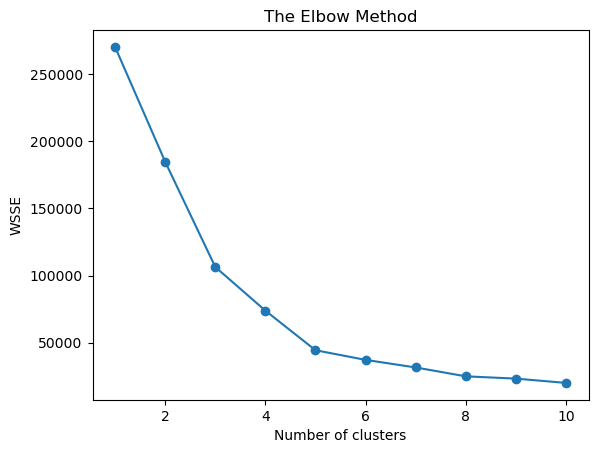

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):  #for loop from range 1 to 10 
    kmeans = KMeans(n_clusters = i,  random_state = 10)   #n clusters is the hyperparamemter.random state is used coz initially the centroids will select the data points randomly
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)  #inertia is a statistical term which tell us about the WSSE.
plt.plot(range(1, 11), wsse)   #the range is the x axis and wsse is Y axis
plt.scatter(range(1, 11),wsse)  #u can remove if u dont want the dots
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

##### The optimum value to create a cluster model is 5 bcoz after that point only, the erroes are decreasing gradually. We can create a cluster model with 5.

In [17]:
print(wsse)  #shows the errors decreasing with each point

[269981.28, 184609.98434090617, 106348.37306211118, 73880.64496247194, 44448.45544793371, 37265.86520484347, 31632.25980947347, 25038.83620868515, 23337.40705378208, 20137.434537925845]


#### Building a model with optimum value. This step builds the model with specific no of clusters

In [19]:
#fitting k means to dataset.
kmeans = KMeans(n_clusters = 5,  random_state = 10)
Y_pred = kmeans.fit_predict(X)

#or

#kmeans,fit(X) --> training
#Y_pred=kmeans.predict(X) --> predicting

In [20]:
Y_pred 
#this can be different among all, bcoz there can be datapoint whose distance will be equal between 2 clusters.at the end the the final model we will be built the same

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

#### 'inertia_ ' helps to calculate the wsse below (within the sum of squared error)

In [22]:
kmeans.inertia_ 

44448.45544793371

#### 'n_iter_' tells the no of iterations that happen in the backend.

In [24]:
kmeans.n_iter_  

7

#### Now lets convert unlabelled data to laballed data 


In [26]:
#by adding it as a col in the main dataframe
mall['Clusters'] = Y_pred
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4


### Visualizing Customer Segments and Cluster Centroids

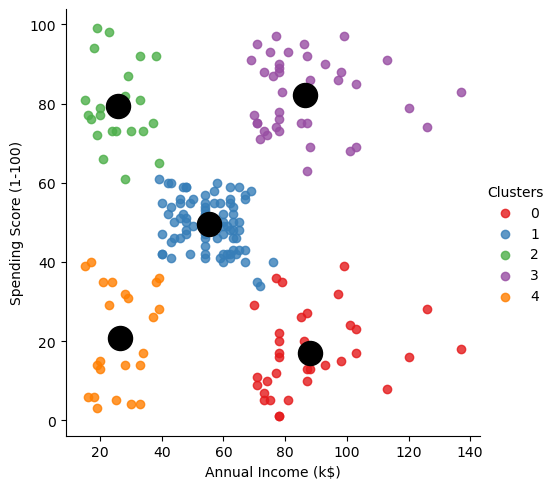

In [28]:
sns.lmplot(data=mall, x='Annual Income (k$)', y='Spending Score (1-100)',   #this plot shows a plot with or without the reg line
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")      #hue = col name
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  #to see the centroids. X->kmeans.cluster_centers_[:, 0], Y->kmeans.cluster_centers_[:, 1]
s = 300, c = 'black')
plt.show()

In [29]:
kmeans.cluster_centers_  #shows the array of centroid(black points)

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

#### Naming the clusters


In [31]:
mall['Clusters'] = mall.Clusters.replace({0:'Careless',1:'Standard',2:'Target',3:'Sensible',4:'Careful'})
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Careful
2,Male,21,15,81,Target
3,Female,20,16,6,Careful
4,Female,23,16,77,Target
5,Female,31,17,40,Careful


In [32]:
pd.set_option('display.max_rows',None) #shows all the rows

In [33]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Careful
2,Male,21,15,81,Target
3,Female,20,16,6,Careful
4,Female,23,16,77,Target
5,Female,31,17,40,Careful
6,Female,22,17,76,Target
7,Female,35,18,6,Careful
8,Female,23,18,94,Target
9,Male,64,19,3,Careful


In [34]:
mall.Clusters.value_counts()

Clusters
Standard    81
Sensible    39
Careless    35
Careful     23
Target      22
Name: count, dtype: int64

### Conclusion
#### The clustering results reveal five distinct customer segments:   
#### Standard (81 customers) 
#### Target (39)
#### Careful (35)
#### Sensible (23)
#### Careless (22)   
#### This segmentation helps identify spending behaviors, allowing for targeted marketing strategies and better customer insights.


######  A PRO TIP: Initially, provide only the result that the client has requested example just 'target customer segment' . If the client wants more, they will return, allowing us to expand the project and increase revenue strategically.

In [36]:
mall_customers = mall[mall['Clusters'] =='Target']
mall_customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
2,Male,21,15,81,Target
4,Female,23,16,77,Target
6,Female,22,17,76,Target
8,Female,23,18,94,Target
10,Female,30,19,72,Target
12,Female,35,19,99,Target
14,Female,24,20,77,Target
16,Male,22,20,79,Target
18,Male,20,21,66,Target


In [37]:
mall_customers.shape

(22, 5)

In [39]:
#save this file and share it to client
mall_customers.to_excel(r'C:\Users\SHIVANG\Documents\Imarticus\GITHUB\K means Clustering (Mall)\K-means Clustering.xlsx',index=True)

In [ ]:
import os
os.getcwd